## Домашняя работа #1.

Домашнее задание сдаётся в виде ссылки (с доступом комментатор или редактор) на Colab в опросе:
	https://forms.gle/LJEMdpXAGUvTu8vP8

##Image pre-processing.

В этой домашней работе мы попробуем поприменять самые простые способы обработки изображений.

* Soft deadline: **27.01.2022 03:00:00 +0003 GMT** 
* Hard deadline: **03.02.2022 03:00:00 +0003 GMT**


In [ ]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np
# from google.colab.patches import cv2_imshow

In [ ]:
def plot(image):
    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    plt.plot()

##### Задача 1 (3 балла)

Загрузите изображение *lena.png* в переменную **lena**. Отобразите результат на экран. Убедитесь, что `opencv` открывает изображение в формате BGR, переведите его в RGB несколькими способами: 
* c помощью функций split & merge
* с помощью индексации в numpy 
* с помощью cvtColor

BGR-lena

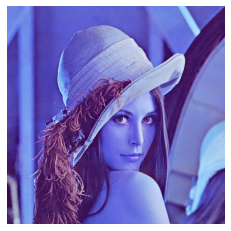

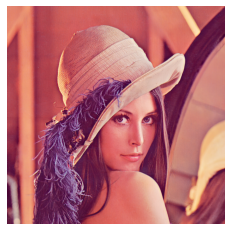

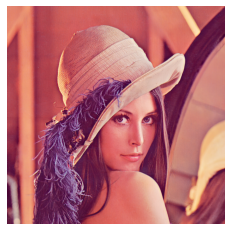

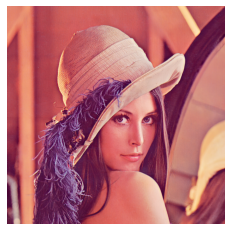

In [ ]:
lena = cv2.imread('/content/lena.png')

print('BGR-lena', end='')
plot(lena)

def split_merge_rgb(image):
    b, g, r = cv2.split(image)
    return cv2.merge([r, g, b])

def ind_rgb(image):
    return image[:, :, ::-1]

def cvt_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plot(split_merge_rgb(lena))
plot(ind_rgb(lena))
plot(cvt_rgb(lena))


##### Задача 2 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

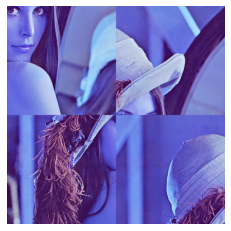

In [ ]:
def swap_parts(image):
    h, w = image.shape[:2]
    new_image = image.copy()
    left, right = new_image[:h//2, :w//2].copy(), new_image[h//2:, w//2:].copy()
    new_image[:h//2, :w//2], new_image[h//2:, w//2:] = right, left
    return new_image

plot(swap_parts(lena))

##### Задача 3 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**. Переведите исходное цветное изображение lena в изображение в градациях серого с помощью функции cvtColor. (lena_gray_cvt). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране. 

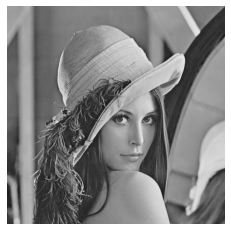

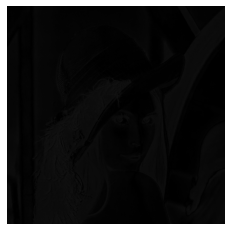

In [20]:
def grey_my(image):
    channel = np.around(np.mean(lena, axis=2)).astype(int)
    return cv2.merge([channel]*3)
lena_gray_my =  grey_my(lena)

lena_gray_cvt = cv2.merge([cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)]*3)

plot(lena_gray_cvt)
plot(np.abs(lena_gray_my - lena_gray_cvt))


##### Задача 4 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

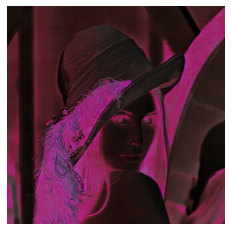

In [ ]:
def brightness_inversion(image):
    # a, b, c = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
    # image_hsv = cv2.merge([a, b, 255 - c])
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image_hsv[:, :, 2] = 255 - image_hsv[:, :, 2]
    return cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

plot(brightness_inversion(lena))


##### Задача 5 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

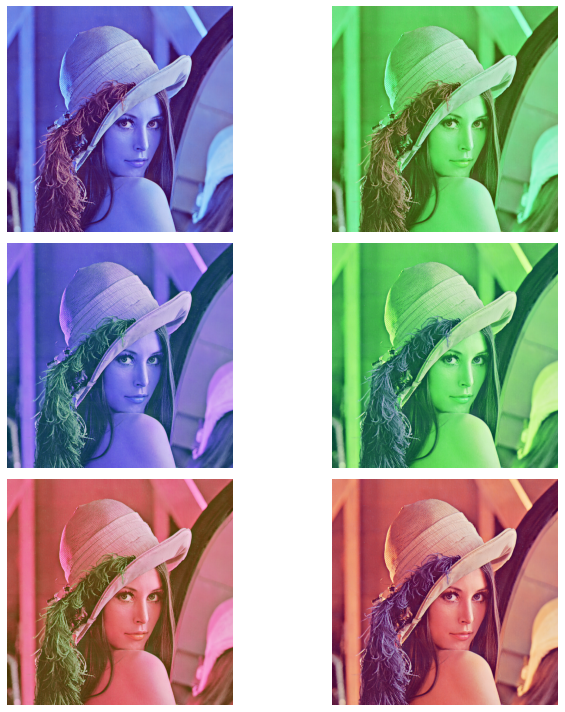

In [ ]:
from itertools import permutations

plt.figure(figsize=(10, 10))

def six_plots(image):
    colors = cv2.split(image)
    for i, x in enumerate(permutations(colors)):
        plt.subplot(3, 2, i + 1)
        plt.axis('off')
        plt.tight_layout()
        plt.imshow(cv2.merge(x))
    plt.show()
six_plots(lena)

#### Задача 6 (3 балла)
Переведите изображение **lena** в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ( 𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒 ) и эквализации гистограммы ( 𝑒𝑞𝑢𝑎𝑙𝑖𝑧𝑒𝐻𝑖𝑠𝑡 ). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности

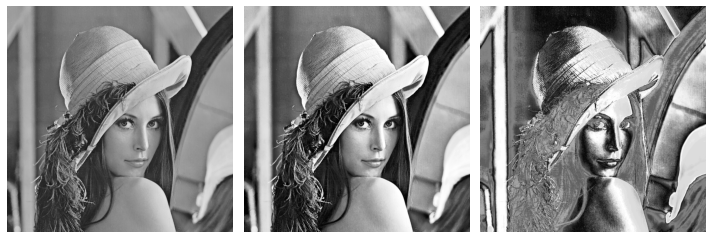

In [ ]:
plt.figure(figsize=(10, 10))
def norm_and_equalize(image):
    image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_norm = cv2.normalize(image_grey, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype('int16')
    image_eq = cv2.equalizeHist(image_grey).astype('int16')
    image_dif = np.abs(image_norm - image_eq)
    plots = [image_norm, image_eq, image_dif]
    for i, x in enumerate(plots):
        plt.subplot(1, 3, i + 1)
        plt.axis('off')
        plt.tight_layout()
        
        plt.imshow(x, cmap='gray')
    plt.show()

norm_and_equalize(lena)

#### Задача 7 (3 балла)
Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

p,q =0.05
p,q =0.1
p,q =0.15
p,q =0.2
p,q =0.3


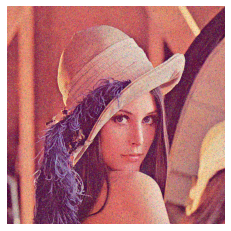

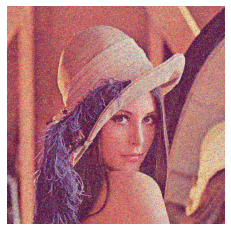

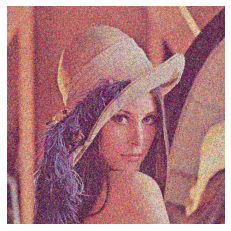

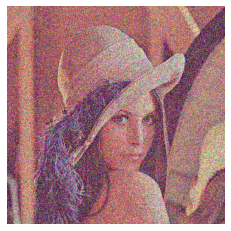

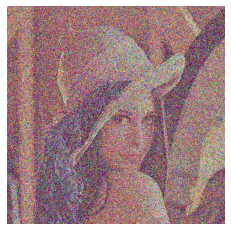

In [ ]:
def salt_and_pepper(src, p, q):
    mask = np.random.uniform(size=src.shape)
    src[mask < p] = 0
    src[mask > 1 - q] = 255
    return src

def lena_salt_and_pepper(image, p, q):
    colors = cv2.split(image)
    new_colors = []
    for color in colors:
        new_colors.append(salt_and_pepper(color, p, q))
    return cv2.merge(new_colors[::-1])

for p in [0.05, 0.1, 0.15,0.2, 0.3]:
    print(f'p,q ={p}')  
    plot(lena_salt_and_pepper(lena, p, p))

####Задча 8 (3 балла)
Реализуйте функцию пространственной фильтрации изображения однородным усредняющим фильтром размера $n \times n$ (все коэффициенты маски равны $\frac{1}{n^2}$). При вычислении среднего используйте тот факт, что при переходе от точки к точке обновляется только часть элементов изображения под маской. Примените реализованный фильтр к предварительно переведенному в градации серого изображению $lena.jpg$ при $n = 3$ и $n = 5$. Визуализируйте изображение, представляющее собой разность полученных результатов фильтрации.

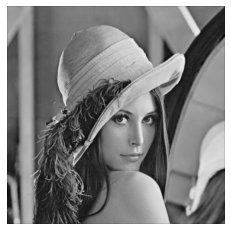

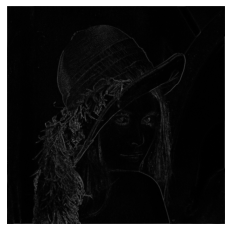

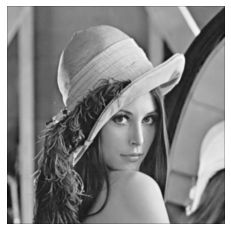

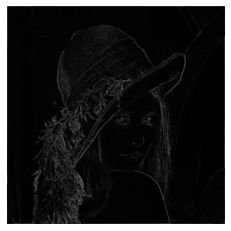

In [ ]:
def box_filter(image, n):
    # padding
    h, w = image.shape
    d = (n-1)//2
    src = np.concatenate((
        np.zeros((d, w)),
        image.copy(),
        np.zeros((d, w))
    ), axis=0)
    src = np.concatenate((
        np.zeros((h + 2 * d, d)),
        src,
        np.zeros((h + 2 * d, d))
    ), axis=1)
    # convoluting!
    res = np.zeros((h, w))
    for y in range(d, h + d):
        for x in range(d, w + d):
            res[y-d][x-d] = np.mean(src[y-d : y+d+1, x-d : x+d+1])
    return res

orig_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
for n in [3, 5]:  
    image = box_filter(orig_gray, n)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

    plt.imshow(np.abs(orig_gray - image), cmap='gray')
    plt.axis('off')
    plt.show()

####Задача 10 (6 баллов) 
С помощью [виджетов](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции.

In [ ]:
from ipywidgets import interactive

def gamma_trasform(image, c, gamma):
    new = image / 255
    return (c * (new ** gamma))[:, :, ::-1]


def gamma_lena(c, gamma):
    plt.figure(figsize=(25, 8))
    plots = [cvt_rgb(lena), gamma_trasform(lena, c, gamma)]
    for i, x in enumerate(plots):
        plt.subplot(1, 3, i + 1)
        plt.axis('off')
        plt.tight_layout()
        plt.imshow(x)
    x = np.arange(0, 1.1, 0.05)
    y = c * x ** gamma
    plt.subplot(1, 3, 3)
    plt.plot(x, y)
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.show()

interactive(gamma_lena, gamma=(0, 2.0), c=(0, 2.0))

interactive(children=(FloatSlider(value=1.0, description='c', max=2.0), FloatSlider(value=1.0, description='ga…